In [2]:
from finlab.data import Data
data = Data()

In [3]:
import datetime

# 將時間回溯到 2017 1 5號當天
data.date = datetime.date(2017,1,5)

rev = data.get('當月營收', 12)

def 股價淨值比(n):
    
    股東權益 = data.get('歸屬於母公司業主之權益合計', n)
    股本 = data.get('普通股股本', n)
    price = data.get('收盤價', 100*n)
    return price.reindex(股本.index, method='ffill')/(股東權益 / 股本)/10


# 當天看到的股價淨值比
pb = 股價淨值比(1)

Index(['1103', '1314', '1471', '1806', '1907', '2038', '2362', '2374', '2380',
       '2448', '2516', '2601', '3037', '3481', '3703', '4930', '6142'],
      dtype='object', name='stock_id')


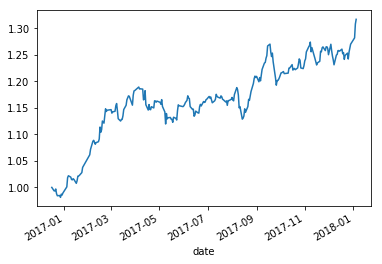

In [6]:

# 時間拉回到一年後
data.date = datetime.date(2018,1,5)

# 拿出這一年的股價
price = data.get('收盤價', 260)

# 第一個條件：股價淨值比最近一天（iloc[-1]）小於 0.5
condition1 = pb.columns[pb.iloc[-1] < 0.5]

# 第二個條件：近三個月平均月營收 > 近一年月營收
condition2 = rev.columns[rev.iloc[-3:].mean() > rev.iloc[-12:].mean()]

# 交集選出股票
print(condition1 & condition2)

# 簡易回測（類似於每支股票買一張）
%matplotlib inline
#price[condition1 & condition2].mean(axis=1).plot()

# 簡易回測（類似於將資產平均分散）
stock_price = price[condition1 & condition2]
(stock_price/stock_price.iloc[0]).mean(axis=1).plot()